In [5]:
import pandas as pd
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from pandas import Series, DataFrame

import scipy
from scipy.stats import spearmanr

from pylab import rcParams

import seaborn as sn 
import sklearn
from sklearn.preprocessing import scale 
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn import preprocessing

data = pd.read_csv('transactions.csv')
%pylab inline
from __future__ import absolute_import, division, print_function

Populating the interactive namespace from numpy and matplotlib


# Data Exploration

In [6]:
data.describe()

#6362620 rows × 11 columns

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


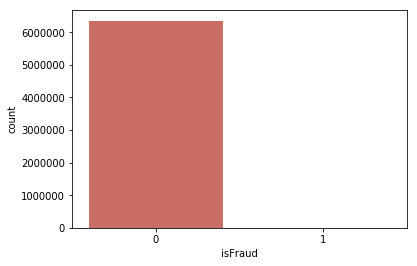

In [7]:
sn.countplot(x='isFraud', data=data, palette='hls')

#Fraud is categorical

In [11]:

# Classified as  Fraud


FraudulentTransacctions = data[data.isFraud == 1].type.value_counts()
FraudulentTransacctions

CASH_OUT    4116
TRANSFER    4097
Name: type, dtype: int64

In [25]:
#Method 2 Manually 


FraudTransfer = data.loc[(data.isFraud == 1) & (data.type == 'TRANSFER')]
FraudCashout = data.loc[(data.isFraud == 1) & (data.type == 'CASH_OUT')]
FraudDebit = data.loc[(data.isFraud == 1) & (data.type == 'DEBIT')] = data.loc[(data.isFraud == 1) & (data.type == 'DEBIT')]

FraudTransfer = len(FraudTransfer)
FraudCashout = len(FraudCashout)

print("The number of Fraud Transfer are: ", FraudTransfer)
print("The number of Fraud Cashout are: ", FraudCashout)


The number of Fraud Transfer are:  4097
The number of Fraud Cashout are:  4116


# Visualizing Fraudulent transactions 

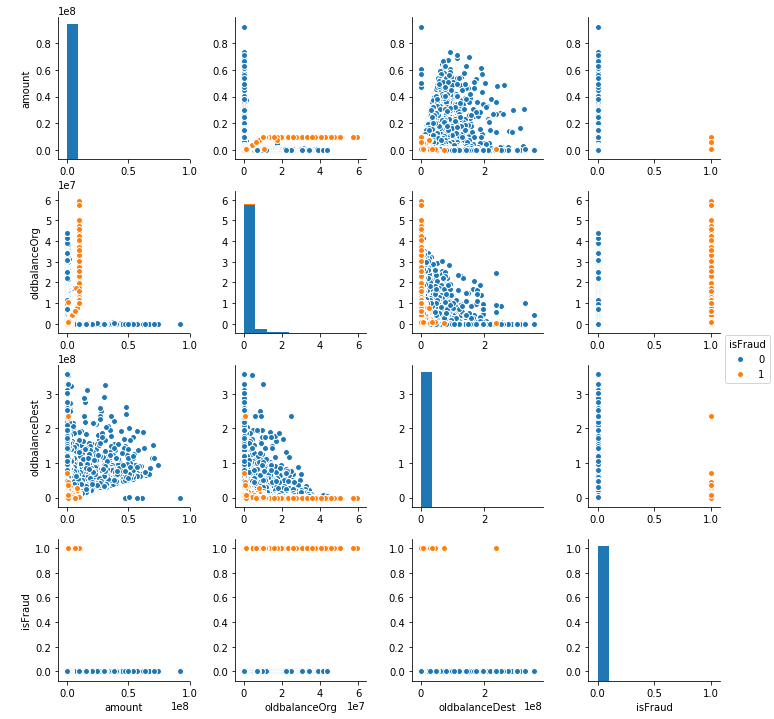

In [9]:

plt.figure(figsize=(12,8))
sns.pairplot(data[['amount', 'oldbalanceOrg', 'oldbalanceDest', 'isFraud']], hue='isFraud')

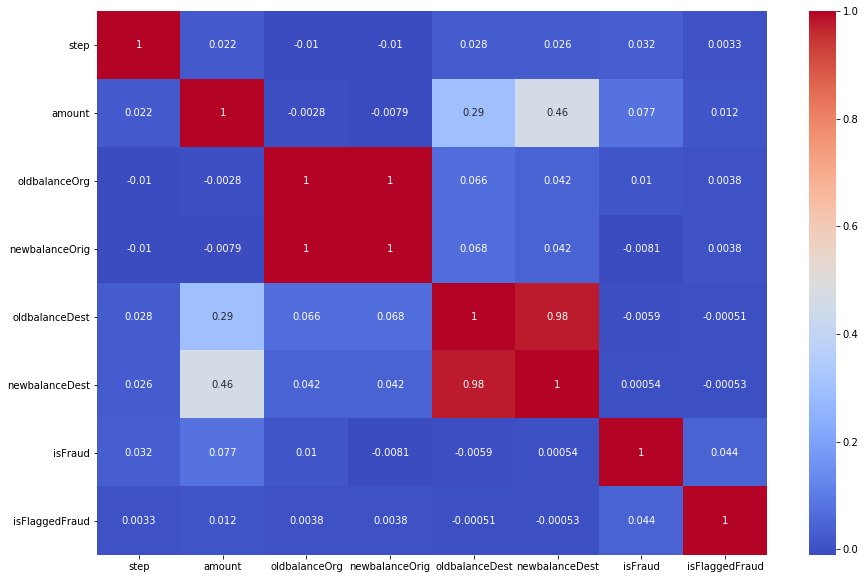

In [10]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(),annot=True,cmap="coolwarm")

In [23]:

count_legit, count_fraud = np.unique(data['isFraud'], return_counts=True)[1]
print("Total Fraud Transactions: ",count_fraud)
print("Total Legitime Transactions: ", count_legit)
fraud_ratio = float(count_fraud / (count_legit + count_fraud))
print('Percent of fraudulant transactions: ', fraud_ratio)

Total Fraud Transactions:  8213
Total Legitime Transactions:  6354407
Percent of fraudulant transactions:  0.00129082044818


In [24]:
#container datatypes classify as  Fraud 


from collections import Counter
F = data['type']
print('Total {}'.format(Counter(F)))
F = data[data['type'] == 'PAYMENT']['isFraud']
print('PAYMENT {}'.format(Counter(F)))
F = data[data['type'] == 'TRANSFER']['isFraud']
print('TRANSFER {}'.format(Counter(F)))
F = data[data['type'] == 'CASH_OUT']['isFraud']
print('CASH_OUT {}'.format(Counter(F)))
F = data[data['type'] == 'DEBIT']['isFraud']
print('DEBIT {}'.format(Counter(F)))
F = data[data['type'] == 'CASH_IN']['isFraud']
print('CASH_IN {}'.format(Counter(F)))

Total Counter({'CASH_OUT': 2237500, 'PAYMENT': 2151495, 'CASH_IN': 1399284, 'TRANSFER': 532909, 'DEBIT': 41432})
PAYMENT Counter({0L: 2151495})
TRANSFER Counter({0L: 528812, 1L: 4097})
CASH_OUT Counter({0L: 2233384, 1L: 4116})
DEBIT Counter({0L: 41432})
CASH_IN Counter({0L: 1399284})


In [26]:
# Legitimate transactions 

In [27]:

LegalTransacctions = data[data.isFraud == 0].type.value_counts()
LegalTransacctions

CASH_OUT    2233384
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     528812
DEBIT         41432
Name: type, dtype: int64

In [28]:
# Fraud  RATIO  CashOut and Transfer 

In [29]:

ratio = (FraudulentTransacctions/LegalTransacctions) * 100
ratio.sort_values(axis=0)

CASH_OUT    0.184294
TRANSFER    0.774755
CASH_IN          NaN
DEBIT            NaN
PAYMENT          NaN
Name: type, dtype: float64

# Data processing 

In [30]:
#########TRANSFER#############

In [31]:
Transfer = data[data['type'] ==  'TRANSFER']

X_transfer = np.array(pd.DataFrame(Transfer, columns=['amount','oldbalanceOrg', 'oldbalanceDest']))
y_transfer = Transfer['isFraud']
y_transfer = np.array(y_transfer.reshape(len(y_transfer), ))


from sklearn.preprocessing import StandardScaler

sc_TRANSFER = StandardScaler()
sc_TRANSFER.fit(X_transfer)
X_TRANSFER_sc = sc_TRANSFER.transform(X_transfer)






C:\Users\Creative\Anaconda2\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


In [32]:
#something is wrong with scipy

In [33]:
from scipy.stats import chi2
import statsmodels.api as sm
logit_model=sm.Logit(y_transfer,X_transfer)
result=logit_model.fit()
#print( result.summary())
######################################

Optimization terminated successfully.
         Current function value: 0.033559
         Iterations 19


#    **** Transfer Transactions ***

In [34]:
# data processing for imbalanced data

In [35]:

from imblearn.over_sampling import SMOTE 

sm = SMOTE(random_state=42)
X_TRANSFER_sm, y__TRANSFER_sm = sm.fit_sample(X_TRANSFER_sc, y_transfer)
print(' New Dataset Transfer shape {}'.format(Counter(y__TRANSFER_sm)))

 New Dataset Transfer shape Counter({0: 528812, 1: 528812})


In [36]:
from sklearn.cross_validation import train_test_split
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(
    X_TRANSFER_sm, y__TRANSFER_sm, test_size=0.7, random_state=0)

C:\Users\Creative\Anaconda2\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


# Logistic Regression

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [38]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.97


# K-folds

In [39]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 0.972


# Confusion Matrix

In [40]:

from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[349946  20315]
 [   410 369666]]


# What can we learn from this matrix?
True negatives total: 349946
False Negatives : 410 Total Type II error 

False Positives : 20315 Total 'they are not afraud transaction'

Total of predicted as Fraud and yes they are Fraudulent Transactions are : 369666 Total

# Precision and Recall


In [41]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       1.00      0.95      0.97    370261
          1       0.95      1.00      0.97    370076

avg / total       0.97      0.97      0.97    740337



The model predicts a Fraud transaction as correct with a Precison of 97%

# ROC Curve

C:\Users\Creative\Anaconda2\lib\site-packages\sklearn\linear_model\base.py:340: RuntimeWarning: overflow encountered in exp
  np.exp(prob, prob)


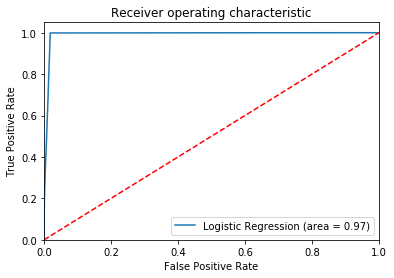

In [42]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

 The above Graph summarizes the perfomance of the classifier Represents a perfect Classification

# CashOut Data#################

In [43]:

CashOut = data[data['type'] == 'CASH_OUT']


In [44]:
from imblearn.over_sampling import SMOTE

In [45]:
df_CASH_OUT = data[data['type'] ==  'CASH_OUT']

X_CASH_OUT = np.array(pd.DataFrame(df_CASH_OUT, columns=['amount','oldbalanceOrg', 'oldbalanceDest']))
y_CASH_OUT = df_CASH_OUT['isFraud']
y_CASH_OUT = np.array(y_CASH_OUT.reshape(len(y_CASH_OUT), ))

sc_CASH_OUT = StandardScaler()
sc_CASH_OUT.fit(X_CASH_OUT)
X_CASH_OUT_sc = sc_CASH_OUT.transform(X_CASH_OUT)

C:\Users\Creative\Anaconda2\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


In [46]:
print('New CashOut dataset shape {}'.format(Counter(y_CASH_OUT)))

X_CASH_OUT_sm, y__CASH_OUT_sm = sm.fit_sample(X_CASH_OUT_sc, y_CASH_OUT)
print('Resampled dataset shape {}'.format(Counter(y__CASH_OUT_sm)))

New CashOut dataset shape Counter({0: 2233384, 1: 4116})
Resampled dataset shape Counter({0: 2233384, 1: 2233384})


In [47]:
from sklearn.cross_validation import train_test_split
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

In [48]:
X_train, X_test, y_train, y_test = train_test_split(
    X_CASH_OUT_sm, y__CASH_OUT_sm, test_size=0.7, random_state=0)


In [49]:
#Logistic regression

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))


Accuracy of logistic regression classifier on test set: 0.83


In [51]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))


10-fold cross validation average accuracy: 0.832


In [52]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[1420473  143070]
 [ 381927 1181268]]


What can we learn from this matrix?  * CashOut Case*

True negatives total: 1420473 False Negatives :  381927Total Type II error

False Positives : 143070 Total 'they are not Fraud transaction'

Total of predicted as Fraud and yes they are Fraudulent Transactions are : 1181268 Total


In [53]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.79      0.91      0.84   1563543
          1       0.89      0.76      0.82   1563195

avg / total       0.84      0.83      0.83   3126738



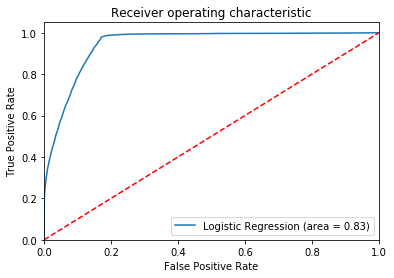

In [54]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:, 1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

The performance was just good .........